In [52]:
import numpy as np # importing libraries
import pandas as pd

In [53]:
from google.colab import drive # connect to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraudulent_E-Commerce_Transaction_Data_2.csv")  # load data

In [55]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


**Data Preprocessing**

In [56]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])   # date format
df['Is Fraudulent'] = df['Is Fraudulent'].astype(bool)

In [57]:
print(df.isnull().sum())  #checking the null values

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [58]:
print(df.duplicated().sum()) # check duplicate values

0


In [59]:
df['Transaction Amount'] = pd.to_numeric(df['Transaction Amount'], errors='coerce')

In [60]:
categorical_cols = ['Payment Method', 'Product Category', 'Customer Location', 'Device Used']  # column into categorical
df[categorical_cols] = df[categorical_cols].astype('category')

In [61]:
df['Transaction Year'] = df['Transaction Date'].dt.year  # extraction year, month, day, weekday in separate column
df['Transaction Month'] = df['Transaction Date'].dt.month
df['Transaction Day'] = df['Transaction Date'].dt.day
df['Transaction Weekday'] = df['Transaction Date'].dt.weekday

In [62]:
df['Amount per Age'] = df['Transaction Amount']/(df['Customer Age'] + 1)  # calculation amount per age , avoiding divide by zero

In [63]:

df['Transactions per Day'] = df['Account Age Days']/(df['Transaction Hour'] + 1)  # calc transaction per day , avoiding divide by zero

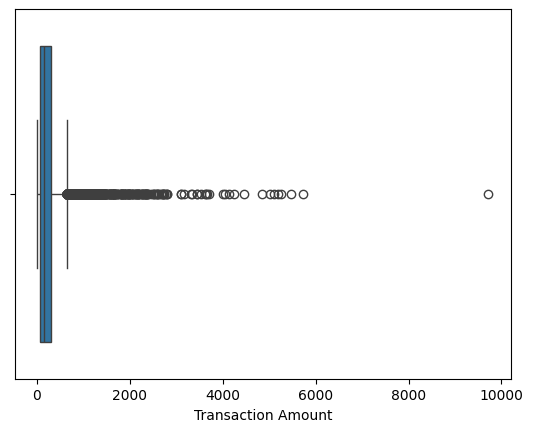

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Transaction Amount']) # plotting transaction boxplot
plt.show()

In [65]:
upper_limit = df['Transaction Amount'].quantile(0.99)  #elimination top 1 percentile transaction
df = df[df['Transaction Amount'] <= upper_limit]

In [66]:
df = pd.get_dummies(df,columns = ['Payment Method','Product Category','Device Used'],drop_first=True)  # one hot encoding

In [67]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Transactions per Day,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,1,40,East Jameshaven,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,...,11.75000,False,False,False,True,False,False,False,False,False
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,3,35,Kingstad,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",...,223.00000,False,True,False,True,False,False,False,False,True
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,5,29,North Ryan,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",...,40.00000,False,False,True,False,False,False,True,False,False
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,5,45,Kaylaville,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",...,15.47619,False,True,False,True,False,False,False,True,False
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,5,42,North Edwardborough,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",...,7.25000,False,True,False,False,False,False,False,False,False


In [68]:
def time_of_day(hour):
    if 5 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Transaction Time Category'] = df['Transaction Hour'].apply(time_of_day)
df['Transaction Time Category'] = df['Transaction Time Category'].astype('category') # checking transaction time and comparing with day phase

In [69]:
df['Is Weekend'] = df['Transaction Date'].dt.weekday.isin([5, 6]).astype(int)  #checking weekend

In [70]:

df['Same Address'] = (df['Shipping Address'] == df['Billing Address']).astype(int) # checking if shipping address is same as billing adress

In [71]:
df['IP Prefix'] = df['IP Address'].apply(lambda x: '.'.join(x.split('.')[:2]))  #extracting ip address first part

In [72]:
ip_counts = df['IP Address'].value_counts()  # checking for rare ip address
df['Rare IP'] = df['IP Address'].apply(lambda x: 1 if ip_counts[x] <= 2 else 0)

In [73]:
df['Transaction Frequency'] = df.groupby('Customer ID')['Customer ID'].transform('count')  # checking transaction frequency

In [74]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Product Category_home & garden,Product Category_toys & games,Device Used_mobile,Device Used_tablet,Transaction Time Category,Is Weekend,Same Address,IP Prefix,Rare IP,Transaction Frequency
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,1,40,East Jameshaven,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,...,False,False,False,False,Night,1,1,110.87,1,1
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,3,35,Kingstad,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",...,False,False,False,True,Night,0,1,14.73,1,1
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,5,29,North Ryan,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",...,False,True,False,False,Morning,0,0,67.58,1,1
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,5,45,Kaylaville,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",...,False,False,True,False,Evening,0,1,202.122,1,1
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,5,42,North Edwardborough,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",...,False,False,False,False,Afternoon,0,1,96.77,1,1


In [75]:
fraud_rates = df.groupby('Customer Location')['Is Fraudulent'].mean()  # checking fraud for locations
df['Customer Location Encoded'] = df['Customer Location'].map(fraud_rates)

<ipython-input-75-fdc15b5f5020>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rates = df.groupby('Customer Location')['Is Fraudulent'].mean()


In [76]:
df['High Quantity Flag'] = df['Quantity'].apply(lambda x: 1 if x >= 10 else 0)   #checking order quantity is greater than 10

In [77]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Device Used_mobile,Device Used_tablet,Transaction Time Category,Is Weekend,Same Address,IP Prefix,Rare IP,Transaction Frequency,Customer Location Encoded,High Quantity Flag
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,1,40,East Jameshaven,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,...,False,False,Night,1,1,110.87,1,1,0.0,0
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,3,35,Kingstad,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",...,False,True,Night,0,1,14.73,1,1,0.0,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,5,29,North Ryan,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",...,False,False,Morning,0,0,67.58,1,1,0.0,0
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,5,45,Kaylaville,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",...,True,False,Evening,0,1,202.122,1,1,0.0,0
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,5,42,North Edwardborough,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",...,False,False,Afternoon,0,1,96.77,1,1,0.0,0


In [78]:
df = pd.get_dummies(df, columns=['Transaction Time Category'], drop_first=True)   #one hot encoding

# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler  # standardization

scaler = StandardScaler()
df[['Transaction Amount', 'Transaction Frequency', 'Customer Location Encoded']] = scaler.fit_transform(
    df[['Transaction Amount', 'Transaction Frequency', 'Customer Location Encoded']]
)


In [80]:
from sklearn.model_selection import train_test_split  #splitting into training and test data

X = df.drop(columns=['Is Fraudulent', 'Transaction ID', 'Customer ID', 'Customer Location', 'IP Address', 'Shipping Address', 'Billing Address'])
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train[0:5]

,Transaction Amount,Transaction Date,Quantity,Customer Age,Account Age Days,Transaction Hour,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday,...,Is Weekend,Same Address,IP Prefix,Rare IP,Transaction Frequency,Customer Location Encoded,High Quantity Flag,Transaction Time Category_Evening,Transaction Time Category_Morning,Transaction Time Category_Night
8982,-0.562840,2024-02-04 11:55:06,3,54,236,11,2024,2,4,6,...,1,1,199.199,1,0.0,-0.270845,0,False,False,False
316,-0.984614,2024-04-07 05:32:12,2,23,59,5,2024,4,7,6,...,1,1,65.243,1,0.0,-0.270845,0,False,True,False
542,-0.093574,2024-03-01 23:49:28,5,24,217,23,2024,3,1,4,...,0,1,203.74,1,0.0,-0.270845,0,False,False,True
9519,3.430664,2024-03-04 21:16:07,5,35,165,21,2024,3,4,0,...,0,1,79.171,1,0.0,-0.270845,0,False,False,True
3996,-0.424251,2024-01-14 18:52:30,2,41,351,18,2024,1,14,6,...,1,1,61.104,1,0.0,-0.270845,0,True,False,False


In [81]:
X_train = X_train.drop(columns=['Transaction Date'])  # drop date column as we have extracted it
X_test = X_test.drop(columns=['Transaction Date'])

In [82]:
X_train[0:5]

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday,Amount per Age,...,Is Weekend,Same Address,IP Prefix,Rare IP,Transaction Frequency,Customer Location Encoded,High Quantity Flag,Transaction Time Category_Evening,Transaction Time Category_Morning,Transaction Time Category_Night
8982,-0.562840,3,54,236,11,2024,2,4,6,1.824545,...,1,1,199.199,1,0.0,-0.270845,0,False,False,False
316,-0.984614,2,23,59,5,2024,4,7,6,0.699167,...,1,1,65.243,1,0.0,-0.270845,0,False,True,False
542,-0.093574,5,24,217,23,2024,3,1,4,7.733200,...,0,1,203.74,1,0.0,-0.270845,0,False,False,True
9519,3.430664,5,35,165,21,2024,3,4,0,24.767222,...,0,1,79.171,1,0.0,-0.270845,0,False,False,True
3996,-0.424251,2,41,351,18,2024,1,14,6,3.043095,...,1,1,61.104,1,0.0,-0.270845,0,True,False,False


In [83]:
y_train[0:5]

,Is Fraudulent
8982,False
316,False
542,False
9519,False
3996,False


In [84]:
print(X_train.dtypes)

Transaction Amount                   float64
Quantity                               int64
Customer Age                           int64
Account Age Days                       int64
Transaction Hour                       int64
Transaction Year                       int32
Transaction Month                      int32
Transaction Day                        int32
Transaction Weekday                    int32
Amount per Age                       float64
Transactions per Day                 float64
Payment Method_bank transfer            bool
Payment Method_credit card              bool
Payment Method_debit card               bool
Product Category_electronics            bool
Product Category_health & beauty        bool
Product Category_home & garden          bool
Product Category_toys & games           bool
Device Used_mobile                      bool
Device Used_tablet                      bool
Is Weekend                             int64
Same Address                           int64
IP Prefix 

In [85]:
X_train['IP Prefix'] = X_train['IP Prefix'].astype('category').cat.codes
X_test['IP Prefix'] = X_test['IP Prefix'].astype('category').cat.codes

In [88]:

#  Replace NaN with column mean
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)


# Check  for any remaining inf values
print(np.isinf(X_train_numeric.to_numpy()).sum())  # Should be 0
print(np.isinf(X_test_numeric.to_numpy()).sum())   # Should be 0


0
0


In [89]:
# Merge back with non-numeric columns
X_train_cleaned = X_train_numeric.join(X_train.select_dtypes(exclude=[np.number]))
X_test_cleaned = X_test_numeric.join(X_test.select_dtypes(exclude=[np.number]))

# **Machine Learning**

In [90]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest model on cleaned data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_cleaned, y_train)

# Make predictions
y_pred = model.predict(X_test_cleaned)

# Evaluate model performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')



Accuracy: 0.9808
Precision: 0.8903
Recall: 0.6540
F1 Score: 0.7541


In [91]:
from imblearn.over_sampling import SMOTE  # balance the data

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train)


In [45]:
# Random Forest hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define optimized hyperparameter grid (smaller search space)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],  # Removed 10
    'min_samples_leaf': [1, 2],  # Removed 4
    'bootstrap': [True]  # Always using bootstrap for faster training
}

# Initialize the model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Uses all cores

# Randomized Search (Reduced iterations and CV)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=1,
    n_jobs=-1, scoring='f1', random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Cross-validation results
print(f'Best CV Score: {random_search.best_score_:.4f}')

# Predictions and evaluation
y_pred_best = best_rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_best):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_best):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_best):.4f}')



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best CV Score: 0.9757
Accuracy: 0.9776
Precision: 0.7624
Recall: 0.7299
F1 Score: 0.7458


In [92]:
#xgboost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_xgb):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_xgb):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_xgb):.4f}')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9752
Precision: 0.7317
Recall: 0.7109
F1 Score: 0.7212


In [93]:
#light gbm classifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_resampled, y_train_resampled)
y_pred_lgbm = lgbm.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_lgbm):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_lgbm):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_lgbm):.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8936, number of negative: 17873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6629
[LightGBM] [Info] Number of data points in the train set: 26809, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333321 -> initscore=-0.693203
[LightGBM] [Info] Start training from score -0.693203
Accuracy: 0.9782
Precision: 0.7685
Recall: 0.7393
F1 Score: 0.7536


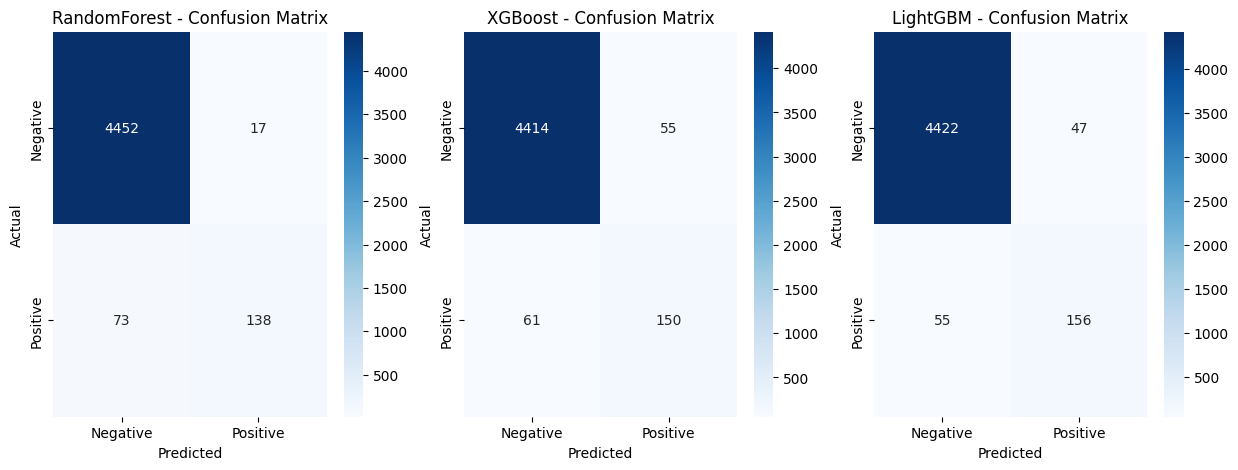

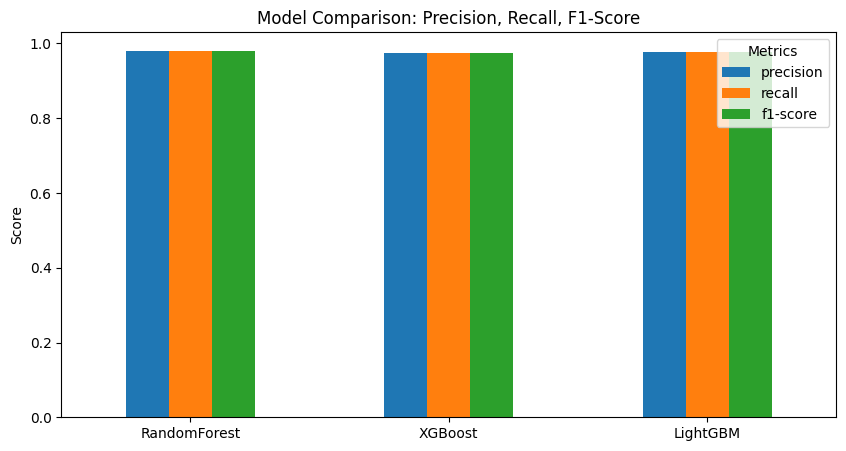

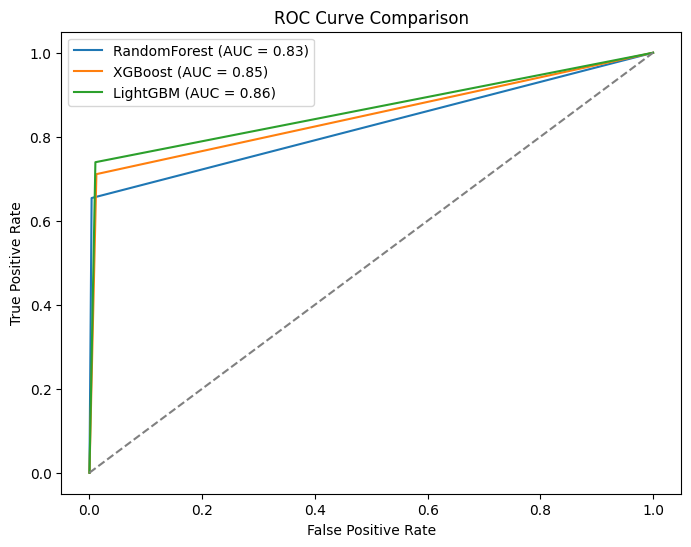

In [94]:
#visualizing results of different models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model names
models = ["RandomForest", "XGBoost", "LightGBM"]
y_preds = [y_pred, y_pred_xgb, y_pred_lgbm]

# Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, y_pred_model) in enumerate(zip(models, y_preds)):
    cm = confusion_matrix(y_test, y_pred_model)
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
plt.show()

# Classification Report Visualization
report_dict = {
    name: classification_report(y_test, y_pred_model, output_dict=True)
    for name, y_pred_model in zip(models, y_preds)
}

# Convert reports to DataFrame
report_df = {name: {metric: report_dict[name]["weighted avg"][metric] for metric in ["precision", "recall", "f1-score"]} for name in models}
report_df = pd.DataFrame(report_df)

# Plot bar chart
report_df.T.plot(kind="bar", figsize=(10, 5))
plt.title("Model Comparison: Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

# ROC Curve & AUC Score
plt.figure(figsize=(8, 6))
for name, y_pred_model in zip(models, y_preds):
    fpr, tpr, _ = roc_curve(y_test, y_pred_model)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


838/838 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6032 - loss: 0.7989 - val_accuracy: 0.9222 - val_loss: 0.4255
Epoch 2/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8321 - loss: 0.5036 - val_accuracy: 0.9671 - val_loss: 0.3688
Epoch 3/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8775 - loss: 0.4064 - val_accuracy: 0.8171 - val_loss: 0.5695
Epoch 4/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9003 - loss: 0.3405 - val_accuracy: 0.9534 - val_loss: 0.3227
Epoch 5/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9174 - loss: 0.3015 - val_accuracy: 0.0566 - val_loss: 1.7707
Epoch 6/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9163 - loss: 0.2993 - val_accuracy: 0.9517 - val_loss: 0.3690
Epoch 7/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9186 - loss: 0.2810 - val_accuracy: 0.9701 - val_loss: 0.1774
Epoch 8/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9265 - loss: 0.2584 - val_accuracy: 0.7902 - val

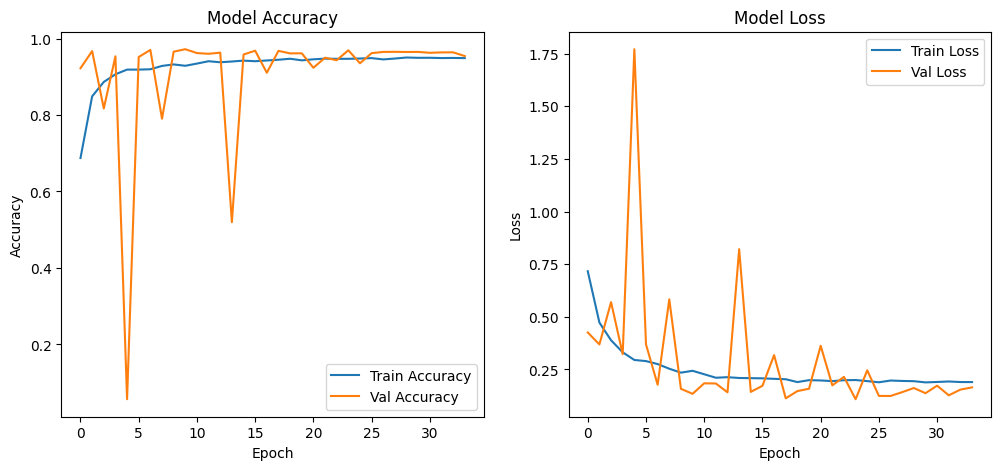

In [97]:
# using neural networks multi layer perceptron for classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

target_classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=target_classes, y=y_train_resampled)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define MLP Model
mlp = Sequential([
    Dense(128, kernel_regularizer=l2(0.001), input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),

    Dense(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

# Compile the model
mlp.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = mlp.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

# Plot training & validation accuracy/loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()
